# Introduction of PCA

In [27]:
def add_labels(X , Y, labels):
    for x, y, l in zip(X, Y, labels):
        text = plt.annotate(l, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') 

In [60]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

cls = PCA(n_components=2)
pcs = cls.fit_transform(X)
cls.components_: les axe principaux
cls.explained_variance_: la variance explique par chque des axes principaux
cls.explained_variance_ratio: le pourcentage explique    
X_test = cls.transform(X_test)

In [9]:
notes = pd.read_csv("data/notes.txt", sep="\s+")

In [19]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(notes)
cls.components_

array([[ 0.51453535,  0.50698853,  0.49235486,  0.48462835,  0.03062778],
       [-0.56694916, -0.37199576,  0.65035356,  0.32323853,  0.11289333],
       [ 0.05132308,  0.01445296, -0.10806565, -0.02254331,  0.99245689],
       [-0.28874852,  0.55305647,  0.39373536, -0.67419539,  0.03443659],
       [-0.57254891,  0.54635285, -0.40978192,  0.45343643, -0.01266839]])

In [29]:
pcs

array([[-8.70090684, -1.70270455, -2.55391818, -0.14945398,  0.11731596],
       [-3.93859585, -0.70854405, -1.81046443, -0.09068389, -0.04349922],
       [-3.20939241,  3.45905516, -0.30066167,  0.17254286, -0.01928215],
       [ 9.75574148,  0.21574207, -3.34367256, -0.17347137, -0.10041455],
       [ 6.37142221, -2.17333261, -0.95705878,  0.07066256,  0.18799232],
       [-2.97401714, -4.65093218,  2.63494569, -0.02321315, -0.14809545],
       [-1.05096657,  6.22717416, -1.68806364,  0.11529582, -0.04281219],
       [ 1.98053256, -4.06855621,  1.40071215,  0.24321198, -0.01039742],
       [ 1.76618257,  3.40209823,  6.61818142, -0.16489082,  0.0591927 ]])

<BarContainer object of 5 artists>

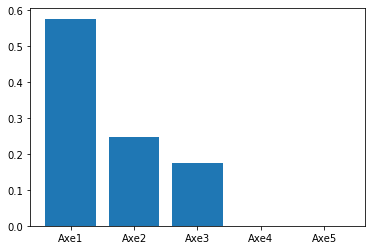

In [25]:
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], cls.explained_variance_ratio_)

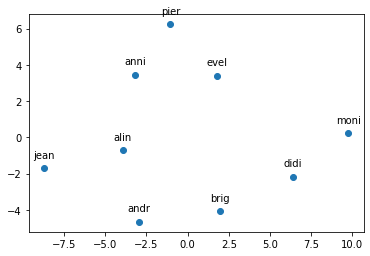

In [28]:
# prejection on the first principal plan
plt.scatter(pcs[:, 0], pcs[:, 1])
add_labels(pcs[:, 0], pcs[:, 1], notes.index)

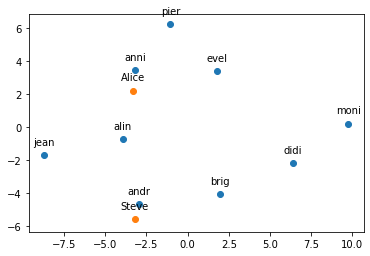

In [35]:
new_notes = pd.DataFrame(
    [[8.0, 6.0, 10.0, 9, 14], 
     [10.0, 11.0, 4.5, 8.0, 6.0]],
    columns = notes.columns,
    index = ["Alice", "Steve"],
)
plt.scatter(pcs[:, 0], pcs[:, 1])
add_labels(pcs[:, 0], pcs[:, 1], notes.index)
pcs_new = cls.transform(new_notes)
plt.scatter(pcs_new[:, 0], pcs_new[:, 1])
add_labels(pcs_new[:, 0], pcs_new[:, 1], new_notes.index)

# PCA on “Crab” data
crabs.csv has 200 lines data of crabs with 8 variables, three of them are qualitative variables and five of them are quantitative variables.

In [94]:
crabs = pd.read_csv("data/crabs.csv", sep="\s+")
crabsquant = crabs.iloc[:, 3:8]

## Analyse

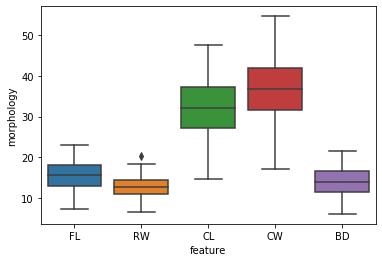

In [48]:
crabs_long = crabs.melt(id_vars=["sp", "sex", "index"],
                       var_name="feature",
                       value_name="morphology")
sns.boxplot(x="feature", y="morphology", data=crabs_long)

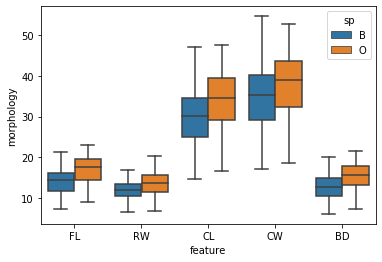

In [49]:
sns.boxplot(x="feature", y="morphology", data=crabs_long, hue="sp")

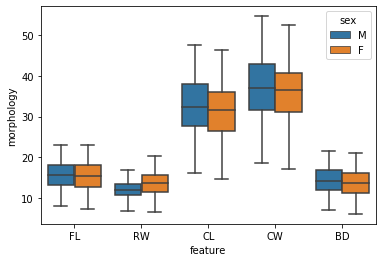

In [50]:
sns.boxplot(x="feature", y="morphology", data=crabs_long, hue="sex")

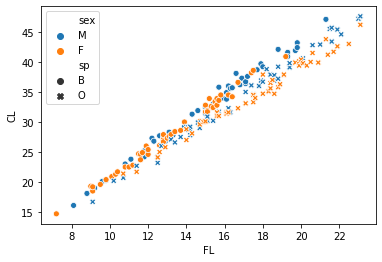

In [51]:
sns.scatterplot(x="FL", y="CL", data=crabs, hue="sex", style="sp")

Variables are correlated, because they represent the sizd of a crabe.
we try to define a variable Taille which combine all variables.

In [97]:
# The sum of all variable
taille1 = crabs.FL + crabs.RW + crabs.CL + crabs.CW + crabs.BD
# The varible which is most correlated to other variables
idx = np.argmax(crabsquant.corr().sum(axis=0).to_numpy())
taille2 = crabsquant.iloc[:, idx]

In [98]:
crabs

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


In [101]:
taille1

0       56.9
1       62.8
2       66.1
3       68.9
4       69.3
       ...  
195    145.5
196    147.3
197    148.6
198    151.2
199    163.1
Length: 200, dtype: float64

If we take size od crabs as a propriety, we remove the influence of it on other attributs.

In [154]:
crabsquant2 = crabsquant.div(taille1, axis=0)

In [151]:
crabsquant3 = crabsquant.div(taille2, axis=0)
crabsquant3 = crabsquant.drop(crabsquant2.columns[idx], axis=1)

## ACP

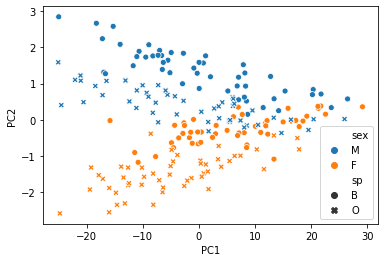

In [139]:
from sklearn.decomposition import PCA
cls = PCA(n_components=5)
pcs_crabs = cls.fit_transform(crabsquant)
df_crabs = pd.DataFrame(pcs_crabs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=crabs.sex, style=crabs.sp, data=df_crabs)

<BarContainer object of 5 artists>

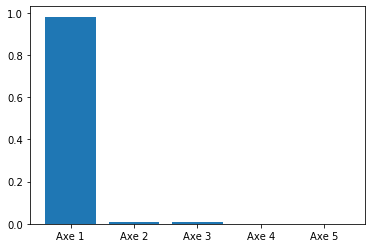

In [135]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)


We take the sum of the present variables

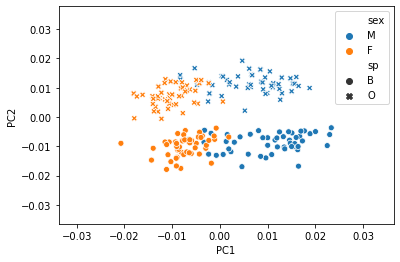

In [156]:
cls = PCA(n_components=5)
pcs_crabs2 = cls.fit_transform(crabsquant2)
df_crabs2 = pd.DataFrame(pcs_crabs2, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=crabs.sex, style=crabs.sp, data=df_crabs2)

<BarContainer object of 5 artists>

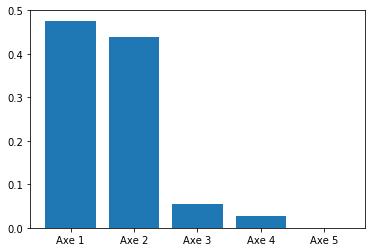

In [157]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)

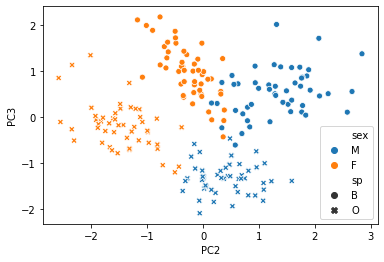

In [158]:
sns.scatterplot(x="PC2", y="PC3", hue=crabs.sex, style=crabs.sp, data=df_crabs)

## ACP by hand

In [161]:
import scipy.linalg as linalg

In [159]:
df = pd.read_csv("data/notes.txt", sep="\s+")
notes = df.to_numpy()
n, p = notes.shape
M = np.eye(p)
Dp = 1/n * np.eye(n)

In [160]:
# centering the data
notes_mean= notes.mean(axis=0)
notes = notes - notes_mean

In [168]:
V = notes.T @ Dp @ notes
valp, vecp = linalg.eig(V @ M)

<BarContainer object of 5 artists>

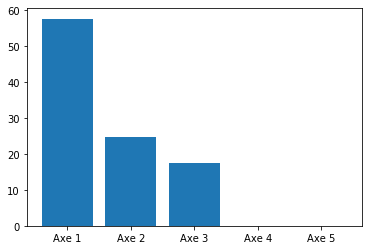

In [169]:
percents = 100 * valp / sum(valp)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], percents)

On retrouve les axes factoriels à quelques différences près :
— scikit-learn utilise une matrice de variance légèrement différente (on divise par n − 1 au
lieu de n) d’où les différences,
— les axes (qui sont des vecteurs propres) sont déterminés au signe près. Le signe dépend de
l’algorithme de calcul de vecteurs propres utilisé.

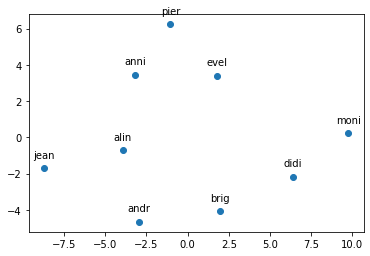

In [177]:
U = vecp
C = notes @ M @ U
plt.scatter(-C[:, 0], C[:, 1])
add_labels(-C[:, 0], C[:, 1], df.index)

array([[-3.66666667, -3.83333333, -5.22222222, -4.55555556, -3.        ],
       [-1.66666667, -1.83333333, -2.22222222, -2.05555556, -2.        ],
       [-3.66666667, -2.83333333,  0.77777778, -0.55555556,  0.        ],
       [ 4.83333333,  4.66666667,  5.27777778,  4.94444444, -3.        ],
       [ 4.33333333,  4.16666667,  1.77777778,  2.44444444, -1.        ],
       [ 1.33333333,  0.16666667, -4.72222222, -3.05555556,  2.        ],
       [-4.16666667, -2.83333333,  3.77777778,  1.44444444, -1.        ],
       [ 3.33333333,  2.66666667, -1.72222222, -0.55555556,  1.        ],
       [-0.66666667, -0.33333333,  2.27777778,  1.94444444,  7.        ]])

array([-8.70090684, -3.93859585, -3.20939241,  9.75574148,  6.37142221,
       -2.97401714, -1.05096657,  1.98053256,  1.76618257])